# Building a simple linear regression model

### Build regression model that will use following datapoints to train model using gradient descent optimization

## Country, income, mortality
- Hungary,200,65.7
- Japan,239,46.7
- France,472,44.4
- Australia,885,22.9
- Switzerland,1045,28.5
- Finland,688,32.4
- Canada,993,33.7

### Complete 50 learning epochs using above datapoints

## Use following datapoints to measure model's prediction error as MSE. 
### Model predictions should be compared w.r.t. measured infant mortality values:
- Greece,134,47.4
- Austria,556,49.1
- Italy,295,55.7
- Denmark,906,27.1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

X = [200,239,472,885,1045,688,993]
Y = [65.7,46.7,44.4,22.9,28.5,32.4,33.7]

X_max = np.max(X)
Y_max = np.max(Y)

# normalize data
X = np.true_divide(X, X_max)
Y = np.true_divide(Y, Y_max)
plt.xlim(0, max(X))
plt.ylim(0, max(Y))

(0, 1.0)

 b0: 0.642388266224 b1: 0.726320592108 Error: 4.51421896498
 b0: 0.469154911159 b1: 0.575809848147 Error: 1.45493354318
 b0: 0.389118282242 b1: 0.487965308044 Error: 0.65743514124
 b0: 0.356100837577 b1: 0.432136718946 Error: 0.440741472292
 b0: 0.346718775095 b1: 0.392793643605 Error: 0.373609241005
 b0: 0.349132845328 b1: 0.362063741028 Error: 0.345386635122
 b0: 0.357350824447 b1: 0.335953523863 Error: 0.327663056562
 b0: 0.368341812406 b1: 0.312434230156 Error: 0.313126094593
 b0: 0.38057467449 b1: 0.290472345121 Error: 0.299876712021
 b0: 0.393277788153 b1: 0.269538572792 Error: 0.287405633543
 b0: 0.406064119137 b1: 0.249359134806 Error: 0.275561134573
 b0: 0.41874133086 b1: 0.229789803985 Error: 0.264284203571
 b0: 0.431215610057 b1: 0.210752101176 Error: 0.253540557684
 b0: 0.443442958143 b1: 0.192200976839 Error: 0.243303158529
 b0: 0.455404523119 b1: 0.174108439221 Error: 0.23354768464
 b0: 0.467094107583 b1: 0.156455259287 Error: 0.224251329637
 b0: 0.478511843689 b1: 0.1392

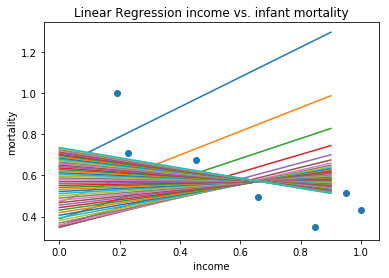

In [12]:
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 2

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b1 = 1.0
b0 = 1.0

learn = 0.1

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')
plt.scatter(X, Y)
plt.pause(0.1);

for i in range(50):
    ERROR = mse(X, Y, calc_total_Error)
    b0_temp_error = mse(X, Y, calc_b0_Error)
    b1_temp_error = mse(X, Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

 b0: -0.224884461049 b1: -0.506294228981 Error: 17.264822331
 b0: 0.172120663358 b1: -0.262906544372 Error: 4.54046000583
 b0: 0.377513749734 b1: -0.146142138595 Error: 1.27234240582
 b0: 0.485755684447 b1: -0.0933553936482 Error: 0.430182362417
 b0: 0.544691809922 b1: -0.0728210180716 Error: 0.210521762771
 b0: 0.578557399311 b1: -0.0684742724836 Error: 0.150718844789
 b0: 0.599629554731 b1: -0.0721821453519 Error: 0.132086083541
 b0: 0.614128704612 b1: -0.0798288319077 Error: 0.124169430174
 b0: 0.625207616943 b1: -0.0893330951998 Error: 0.119149349221
 b0: 0.634465286926 b1: -0.0996440938244 Error: 0.115012982431
 b0: 0.642713697571 b1: -0.110232786985 Error: 0.111237360327
 b0: 0.650366172648 b1: -0.120834341327 Error: 0.107682019688
 b0: 0.657634072295 b1: -0.131317666014 Error: 0.104304916823
 b0: 0.664626417317 b1: -0.141619336152 Error: 0.101089538057
 b0: 0.671400348393 b1: -0.151710127807 Error: 0.098026188389
 b0: 0.677986683968 b1: -0.161578070219 Error: 0.0951071788629
 b0

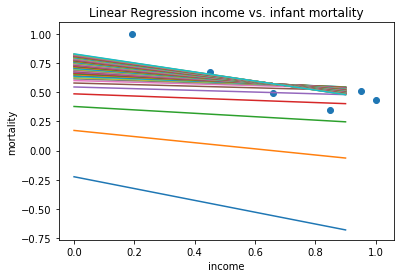

In [11]:
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 2

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b1 = -1.0
b0 = -1.0

learn = 0.1

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')
plt.scatter(X, Y)
plt.pause(0.1);


for i in range(50):
    ERROR = mse(X, Y, calc_total_Error)
    b0_temp_error = mse(X, Y, calc_b0_Error)
    b1_temp_error = mse(X, Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

# Review Questions
1. What are the model’s parameter values and measured MSE for the test datapoints at the
end of the optimization process when the starting parameter values are b0 = 1 and b1 = 1:
- b0 = 0.735426560553
- b1 = -0.248110624154
- MSE = 0.0725572544871

2. Repeat the above optimization, but set the starting parameter values to b0 = -1 and b1
= -1. Again, report the final parameter values and the model’s MSE:
- b0 = 0.828382923589
- b1 = -0.388250595462 
- MSE = 0.0474769930197

3. Is there a discrepancy in the reported MSE values in (1) and (2)? Why/Why Not.
There is a discrepancy in the reported MSE values in (1) and (2) because when using negative weights the regression fits the data better, since looking at the data graphed up, the data has a downward trend - a decreasing slope which negative weights for b0 and b1 model better.